In [1]:
import os
print(os.getcwd())  # This prints the current working directory
os.chdir(r'c:\users\ermias.tadesse\10x\Telecom-Analysis')  # Set the working directory to the project root
import pandas as pd

# Import the DBConnection and DataAnalysis classes
from scripts.db_connection import DBConnection
from scripts.user_endagement_analysis import UserEngagementAnalysis

c:\Users\ermias.tadesse\10x\Telecom-Analysis\notebooks


In [2]:
# Create a connection instance
db = DBConnection(dbname='tele_co', user='postgres', password='Ermi@123')

# Connect to the database
db.connect()

# Define a query to fetch data from the xdr_data table
query = "SELECT * FROM xdr_data;"

# Fetch data
data = db.fetch_data(query)

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Applications
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
    
# Create a DataAnalysis instance
analysis = UserEngagementAnalysis(data, applications)

# Check if data is returned
if data is not None and not data.empty:
    # Display the DataFrame
    print(data.head())
else:
    print("No data available or data is empty.")

Successfully connected to the database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0  9.16456699548519E+015             42.0              5.0   
1                L77566A             65.0             

# Replace common null values and check for missing values

In [3]:
# Replace common null values and check for missing values
missing_vals = analysis.check_missing_values()
analysis.fill_missing_with_mean()

Missing Values in DataFrame (columns with missing data):
                                          Missing Values Percentage (%)
Bearer Id                                            991          0.66%
Start                                                  1           0.0%
Start ms                                               1           0.0%
End                                                    1           0.0%
End ms                                                 1           0.0%
Dur. (ms)                                              1           0.0%
IMSI                                                 570          0.38%
MSISDN/Number                                       1066          0.71%
IMEI                                                 572          0.38%
Last Location Name                                  1153          0.77%
Avg RTT DL (ms)                                    27829         18.55%
Avg RTT UL (ms)                                    27812         18.54%
Avg Bea

c:\users\ermias.tadesse\10x\Telecom-Analysis\scripts\user_endagement_analysis.py:96: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.dataframe[col].fillna(self.dataframe[col].mean(), inplace=True)


Filled missing values in column: 250 Kbps < DL TP < 1 Mbps (%)
Filled missing values in column: DL TP > 1 Mbps (%)
Filled missing values in column: UL TP < 10 Kbps (%)
Filled missing values in column: 10 Kbps < UL TP < 50 Kbps (%)
Filled missing values in column: 50 Kbps < UL TP < 300 Kbps (%)
Filled missing values in column: UL TP > 300 Kbps (%)
Filled missing values in column: HTTP DL (Bytes)
Filled missing values in column: HTTP UL (Bytes)
Filled missing values in column: Activity Duration DL (ms)
Filled missing values in column: Activity Duration UL (ms)
Filled missing values in column: Dur. (ms).1
Filled missing values in column: Nb of sec with 125000B < Vol DL
Filled missing values in column: Nb of sec with 1250B < Vol UL < 6250B
Filled missing values in column: Nb of sec with 31250B < Vol DL < 125000B
Filled missing values in column: Nb of sec with 37500B < Vol UL
Filled missing values in column: Nb of sec with 6250B < Vol DL < 31250B
Filled missing values in column: Nb of sec w

Total Data (DL+UL in Gigabytes) per Decile Class:
Decile Class
0     5065.721127
1     5689.831830
2     6087.498457
3     5619.824693
4     4790.892542
5     5984.493776
6     5729.941504
7     7285.023306
8     8667.128382
9    14337.625731
Name: Total Data (DL+UL), dtype: float64

Top 5 Deciles based on Total Data (DL+UL):
Decile Class
9    14337.625731
8     8667.128382
7     7285.023306
2     6087.498457
5     5984.493776
Name: Total Data (DL+UL), dtype: float64
Top 5 Highest Duration Decile Classes and Their Total Duration:
Decile Class: 9, Total Duration: 5178808.864560347 seconds
Decile Class: 8, Total Duration: 2486746.0870000003 seconds
Decile Class: 7, Total Duration: 1869399.264 seconds
Decile Class: 6, Total Duration: 1579210.392 seconds
Decile Class: 5, Total Duration: 1254766.514 seconds


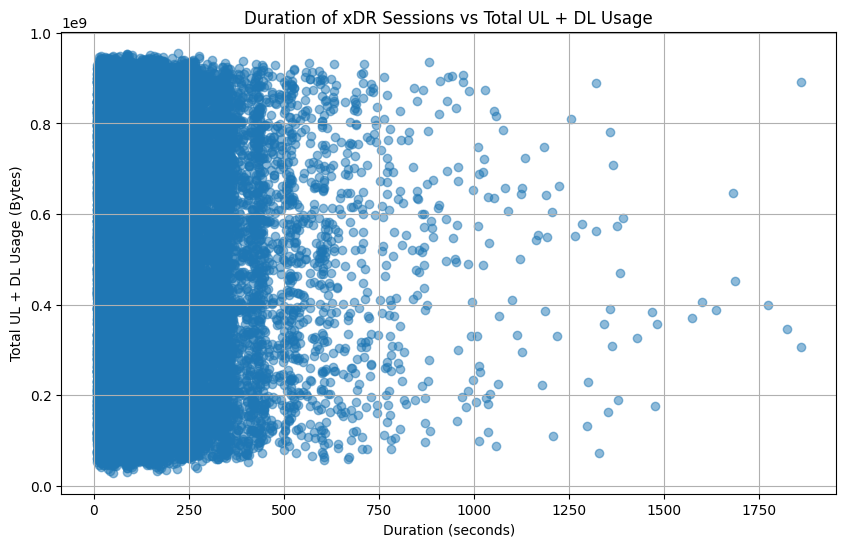

In [4]:
analysis.aggregate_data()
analysis.segment_deciles()
top_deciles = analysis.analyze_deciles()
analysis.average_session_duration()
analysis.plot_data_usage()

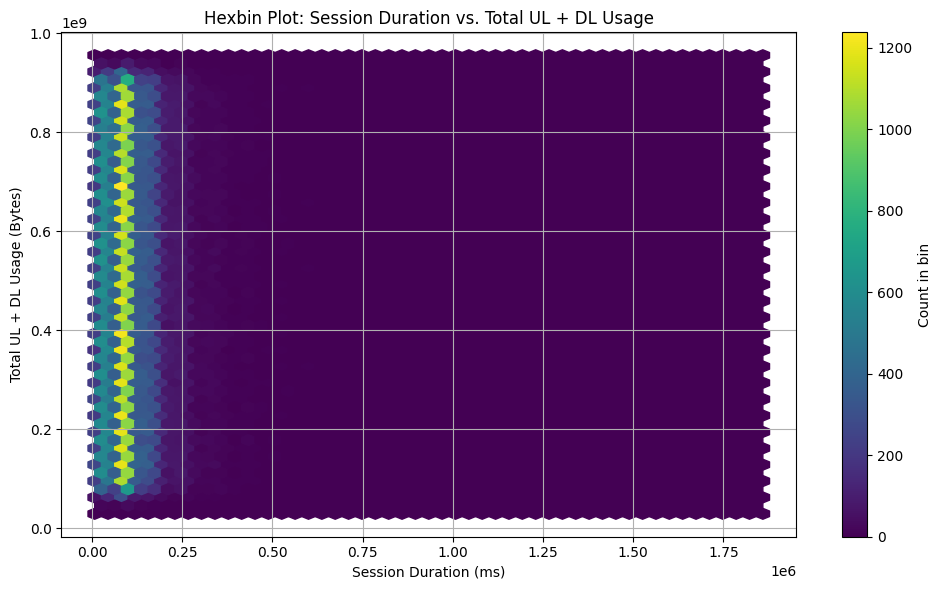

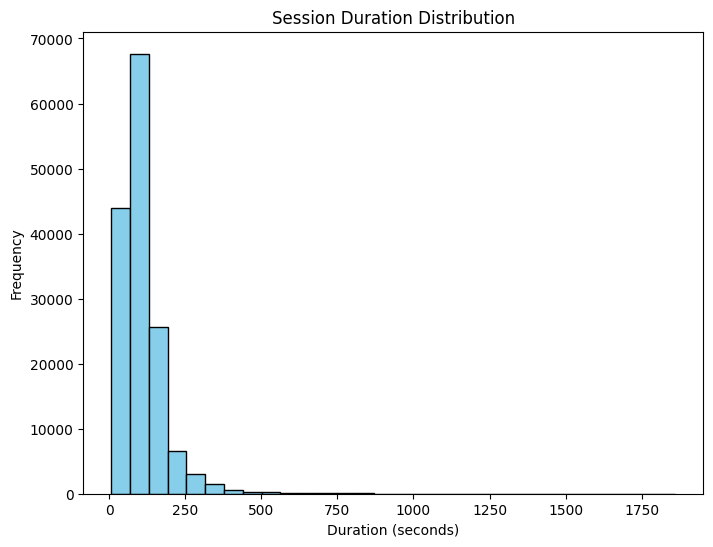

Network Performance Metrics:
       Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
count    150001.000000    150001.000000            150001.000000   
mean        109.795706        17.662883             13300.045927   
std         559.342620        76.529933             23971.798635   
min           0.000000         0.000000                 0.000000   
25%          35.000000         3.000000                43.000000   
50%          54.000000         7.000000                63.000000   
75%         109.795706        17.662883             19710.000000   
max       96923.000000      7120.000000            378160.000000   

       Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
count            150001.000000                 1.500010e+05   
mean               1770.428647                 2.080991e+07   
std                4625.340082                 1.172356e+08   
min                   0.000000                 2.000000e+00   
25%                  47.000000             

In [5]:
analysis.plot_hexbin()
analysis.plot_session_duration_distribution()
analysis.analyze_network_performance()
analysis.calculate_session_duration_statistics()

Datetime columns identified: Index([], dtype='object')
Numeric DataFrame:
       Bearer Id  Start ms  End ms  Dur. (ms)          IMSI  MSISDN/Number  \
0  1.311448e+19     770.0   662.0  1823652.0  2.082014e+14   3.366496e+10   
1  1.311448e+19     235.0   606.0  1365104.0  2.082019e+14   3.368185e+10   
2  1.311448e+19       1.0   652.0  1361762.0  2.082003e+14   3.376063e+10   
3  1.311448e+19     486.0   171.0  1321509.0  2.082014e+14   3.375034e+10   
4  1.311448e+19     565.0   954.0  1089009.0  2.082014e+14   3.369980e+10   

           IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0  3.552121e+13        42.000000         5.000000                     23.0   
1  3.579401e+13        65.000000         5.000000                     16.0   
2  3.528151e+13       109.795706        17.662883                      6.0   
3  3.535661e+13       109.795706        17.662883                     44.0   
4  3.540701e+13       109.795706        17.662883                      6

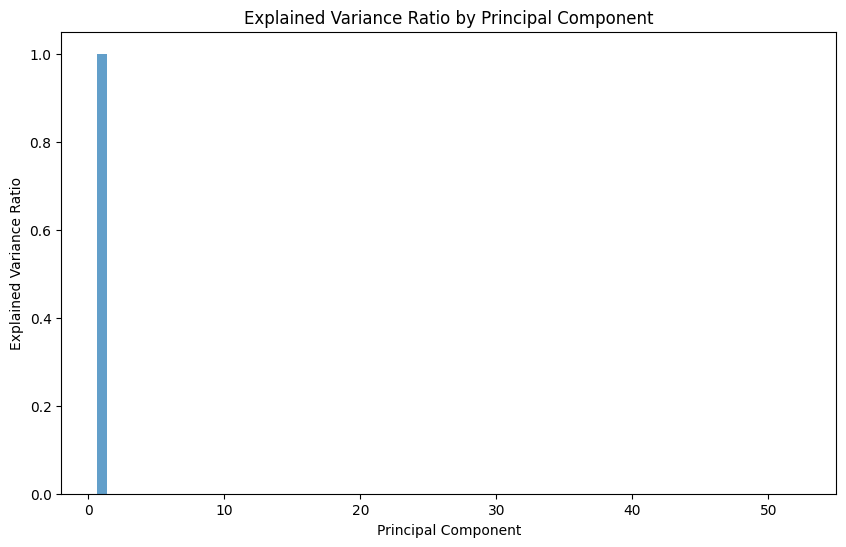

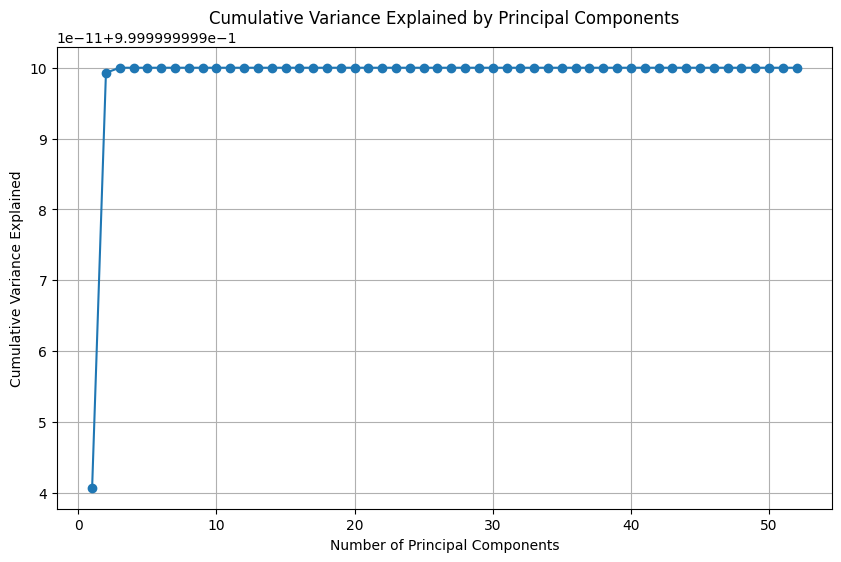

In [6]:
analysis.preprocess_data()
analysis.perform_pca()
analysis.plot_explained_variance()
analysis.plot_cumulative_variance()

Datetime columns identified: Index([], dtype='object')
Numeric DataFrame:
       Bearer Id  Start ms  End ms  Dur. (ms)          IMSI  MSISDN/Number  \
0  1.311448e+19     770.0   662.0  1823652.0  2.082014e+14   3.366496e+10   
1  1.311448e+19     235.0   606.0  1365104.0  2.082019e+14   3.368185e+10   
2  1.311448e+19       1.0   652.0  1361762.0  2.082003e+14   3.376063e+10   
3  1.311448e+19     486.0   171.0  1321509.0  2.082014e+14   3.375034e+10   
4  1.311448e+19     565.0   954.0  1089009.0  2.082014e+14   3.369980e+10   

           IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0  3.552121e+13        42.000000         5.000000                     23.0   
1  3.579401e+13        65.000000         5.000000                     16.0   
2  3.528151e+13       109.795706        17.662883                      6.0   
3  3.535661e+13       109.795706        17.662883                     44.0   
4  3.540701e+13       109.795706        17.662883                      6

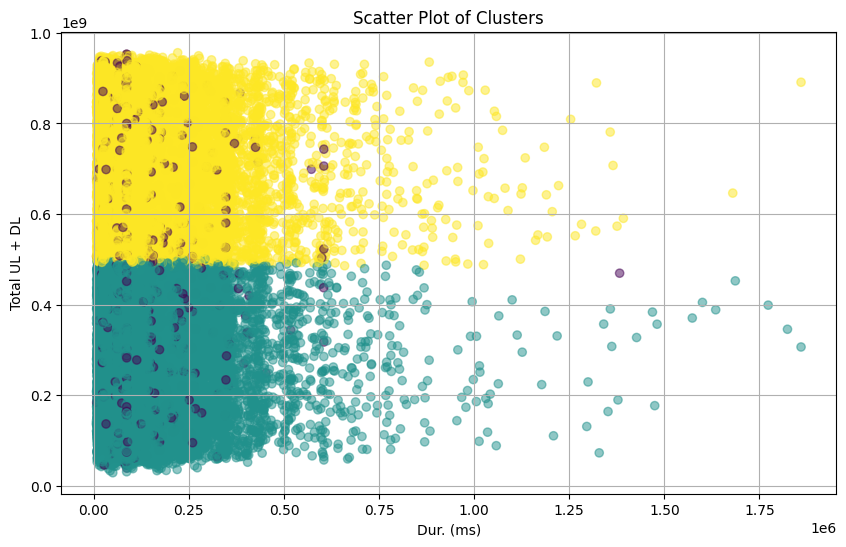

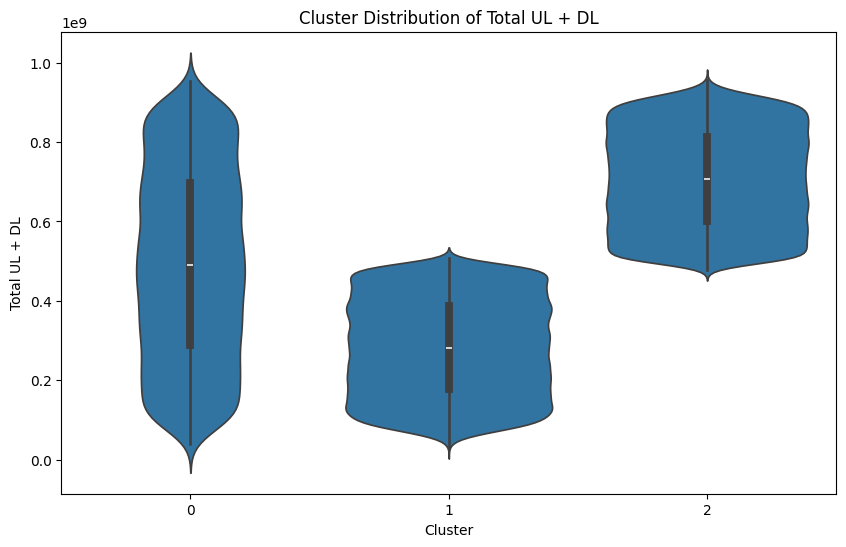

Cluster statistics:
        Dur. (ms)                                         Total UL + DL  \
              min        max           mean           sum           min   
Cluster                                                                   
0          7704.0  1382408.0   86003.020587  1.127930e+09    39227912.0   
1          7189.0  1859336.0  106167.113238  7.208853e+09    28956107.0   
2          7142.0  1859327.0  106611.667603  7.354606e+09   477564644.0   

                                                 Session Duration (seconds)  \
                 max          mean           sum                        min   
Cluster                                                                       
0        952641334.0  4.929924e+08  6.465595e+12                      7.704   
1        508173104.0  2.823875e+08  1.917440e+13                      7.189   
2        955984776.0  7.063159e+08  4.872520e+13                      7.142   

                                             
        

<Figure size 1000x600 with 0 Axes>

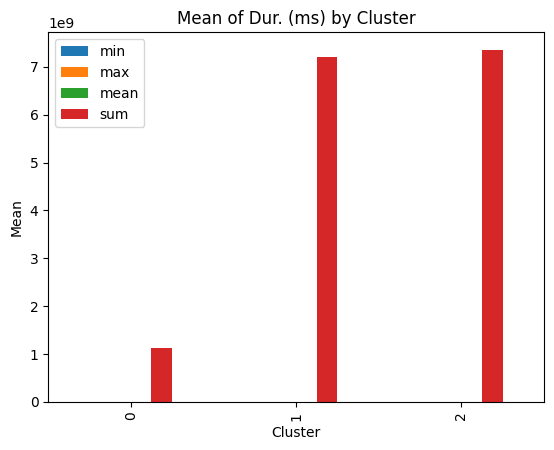

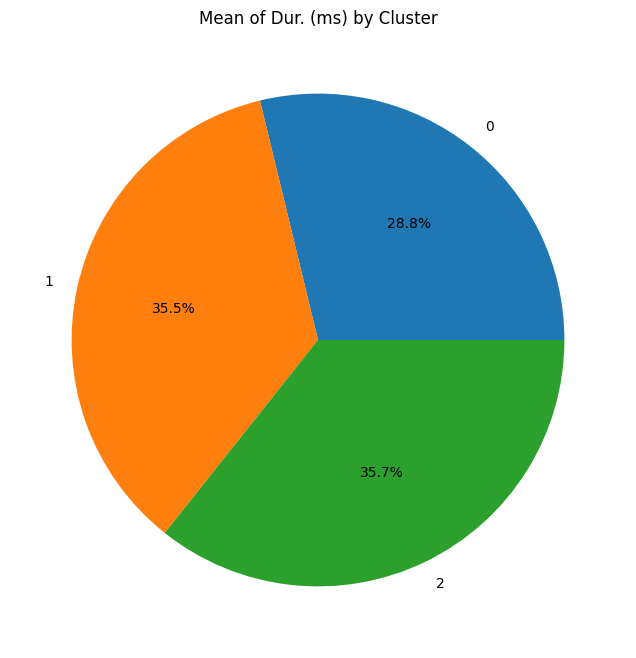

<Figure size 1000x600 with 0 Axes>

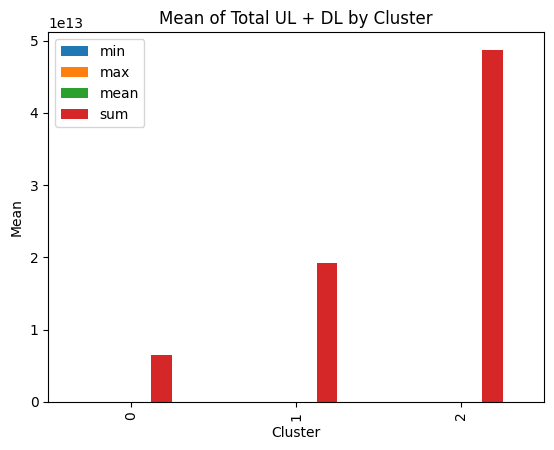

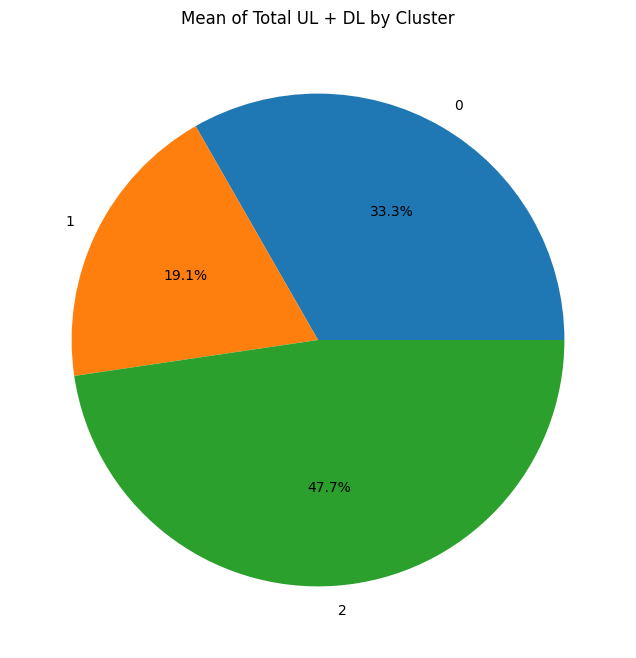

<Figure size 1000x600 with 0 Axes>

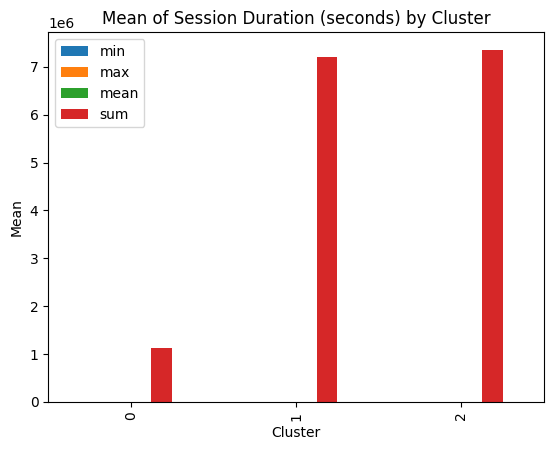

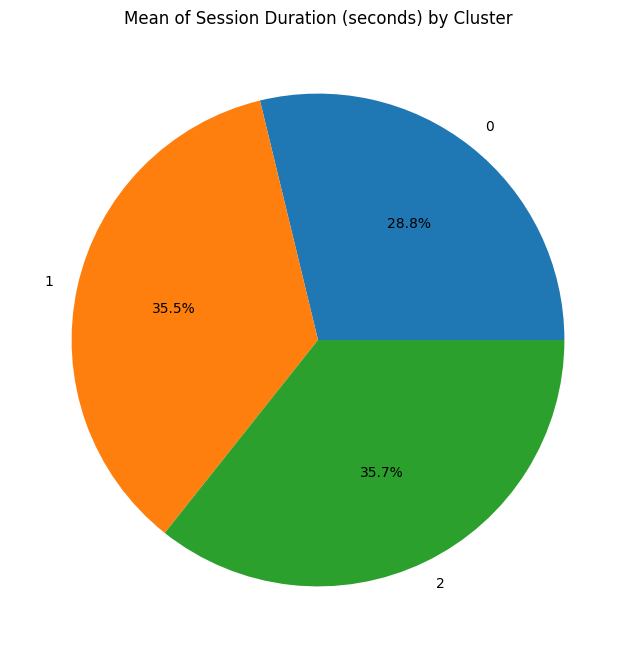

In [7]:
analysis.preprocess_data()
analysis.convert_units()  # Ensure all units are consistent
analysis.perform_pca()
num_components = analysis.determine_optimal_components()
loadings = analysis.analyze_loadings()
engagement_metrics = analysis.aggregate_metric_analyze()
user_data_with_clusters = analysis.normalize_and_cluster()

print("Analyzing user engagement metrics...")
print(engagement_metrics)

print("Clustering user data for engagement metrics...")
print(user_data_with_clusters.head())

analysis.plot_scatter_cluster(['Dur. (ms)', 'Total UL + DL'])
analysis.visualize_distributions()

cluster_stats = analysis.analyze_clusters()
print("Cluster statistics:")
print(cluster_stats)

features_to_plot = ['Dur. (ms)', 'Total UL + DL', 'Session Duration (seconds)']
stat_to_plot = 'mean'
for feature in features_to_plot:
    analysis.plot_bar_cluster_stats(cluster_stats.copy(), feature, stat_to_plot)
    analysis.plot_pie_cluster_stats(cluster_stats.copy(), feature, stat_to_plot)